© [Mariia Seleznova](https://www.ai.math.uni-muenchen.de/members/postdocs/mariia-seleznova/index.html), 2025. [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).

# 📘 Kernel SVM: Nonlinear Classification via Duality

In this class, we introduce **Kernel SVM** — our first truly **nonlinear model**, capable of learning **nonlinear decision boundaries**. To properly formulate kernel SVM, we first need to understand the concept of **Lagrangian duality**. This will take a bit of setup, so bear with me.


## ⚙️ Lagrangian Duality

Consider a convex minimization problem with inequality constraints:

$$
\begin{aligned}
\min_{w} \quad & f(w) \\
\text{s.t.} \quad & h_i(w) \leq 0, \quad i = 1,\dots,n
\end{aligned}
$$

We define the **Lagrangian function** as:

$$
L(w, \lambda) = f(w) + \sum_{i=1}^n \lambda_i h_i(w)
$$

where $\lambda_i \geq 0$ are called **Lagrange multipliers**.

### 🔁 From Constrained to Unconstrained

We can now rewrite the constrained optimization problem as an unconstrained one:

$$
\min_w \max_{\lambda \geq 0} L(w, \lambda)
$$

This works because:

$$
\max_{\lambda \geq 0} L(w, \lambda) =
\begin{cases}
f(w) & \text{if } h_i(w) \leq 0 \ \forall i \\
+\infty & \text{otherwise}
\end{cases}
$$

## 🔄 Duality

The minimax formulation allows to introduce **primal** (right-hand side) and **dual** (left-hand side) problems, which are related by the following inequality:

$$
\max_{\lambda \geq 0} \min_{w} L(w, \lambda) \leq \min_{w} \max_{\lambda \geq 0} L(w, \lambda)
$$

We define the **dual function**:

$$
g(\lambda) = \min_w L(w, \lambda)
$$

and write the **dual problem** as:

$$
\begin{aligned}
\max_\lambda \quad & g(\lambda) \\
\text{s.t.} \quad & \lambda_i \geq 0, \quad i = 1,\dots,n
\end{aligned}
$$

Solving the dual can be easier or more insightful than solving the primal directly — and this is exactly the case in SVMs.

## ✅ Strong Duality

In general, the dual gives a **lower bound** on the primal solution. The difference is the **duality gap**. If **strong duality** holds:

$$
\max_{\lambda \geq 0} \min_{w} L(w, \lambda) = \min_{w} \max_{\lambda \geq 0} L(w, \lambda)
$$

then solving the dual gives the exact solution to the primal.

### 📏 Slater's Condition

Strong duality is guaranteed under **Slater’s condition**:

> **Slater’s Condition**  
> If the problem is convex and there exists a point $x \in \text{relint}(D)$ (relative interior of the joint domain $D$ of the constraints) such that  
> $$
> h_i(x) < 0 \quad \text{for all } i,
> $$  
> then strong duality holds. For affine (linear) constraints, strict inequalities are not required.

An immediate consequence of the Slater's condition is that strong duality holds for all **convex problems with affine-linear constraints** (such as SVM!) that have a solution.

## 🧠 Karush–Kuhn–Tucker (KKT) Conditions

The **KKT conditions** are sufficient (and necessary under Slater's condition) for optimality in constrained optimization. The solution $(w^*,\lambda^*)$ satusfies KKT if the following holds:

### ✅ KKT Conditions

1. **Stationarity**:
   $$
   \nabla_w L(w^*, \lambda^*) = \nabla f(w^*) + \sum_i \lambda_i^* \nabla h_i(w^*) = 0
   $$

2. **Primal feasibility**:
   $$
   h_i(w^*) \leq 0, \quad \forall i
   $$

3. **Dual feasibility**:
   $$
   \lambda_i^* \geq 0, \quad \forall i
   $$

4. **Complementary slackness**:
   $$
   \lambda_i^* h_i(w^*) = 0, \quad \forall i
   $$

### 🧩 Interpretation

- If a constraint is **not active**, its multiplier is zero.
- If a constraint **is active**, its multiplier may be positive and affects the optimality condition.
- These conditions help us derive the **dual form of the SVM problem**, and explain why only support vectors matter.

> 📌 _You can look up the general form of KKT conditions for problems with both equality and inequality constraints. For convex problems with affine constraints, no extra regularity conditions are needed for KKT to apply._


# 📘 Dual Problem of Soft-Margin SVM

Recall the constrained form of the soft-margin SVM optimization problem:

$$
\begin{aligned}
\min_{w, b, \xi} \quad & \dfrac{1}{2} \|w\|_2^2 + C \sum_{i=1}^N \xi_i \\
\text{s.t.} \quad & y_i(\langle w, x_i \rangle + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
\end{aligned}
$$

This is the **primal problem**. It is equivalent to the unconstrained formulation:

$$
\min_{w, b} \ \dfrac{1}{2} \|w\|^2 + C \sum_{i=1}^N \max(0, 1 - y_i(\langle w, x_i \rangle + b))
$$

## 🧮 Deriving the Dual

We define the Lagrangian:

$$
L(w, b, \xi, \lambda, \mu) = \dfrac{1}{2} \|w\|^2 + C \sum_i \xi_i + \sum_i \lambda_i (1 - \xi_i - y_i(\langle w, x_i \rangle + b)) - \sum_i \mu_i \xi_i
$$

with multipliers $\lambda_i \geq 0$, $\mu_i \geq 0$ (KKT condition 3 - **dual feasibility**). To form the dual, we need to minimize the Lagrangian:

$$
g(\lambda, \mu) = \min_{w, b, \xi} L(w, b, \xi, \lambda, \mu)
$$

### 📐 Stationarity (KKT Condition 1)

- $\frac{\partial L}{\partial w} = w - \sum_i \lambda_i y_i x_i = 0 \Rightarrow w^* = \sum_i \lambda_i y_i x_i$
- $\frac{\partial L}{\partial b} = - \sum_i \lambda_i y_i = 0$
- $\frac{\partial L}{\partial \xi_i} = C - \lambda_i - \mu_i = 0 \Rightarrow \mu_i = C - \lambda_i$

Substitute into $L$, eliminate $w$, $b$, and $\xi_i$ to get the dual:

$$
g(\lambda) = \sum_i \lambda_i - \dfrac{1}{2} \sum_{i,j} \lambda_i \lambda_j y_i y_j x_i^T x_j
$$

## 🧠 Dual Optimization Problem
Putting everything together, we get the following form for the dual problem:
$$
\begin{aligned}
\max_{\lambda} \quad & \sum_i \lambda_i - \dfrac{1}{2} \sum_{i,j} \lambda_i \lambda_j y_i y_j x_i^T x_j \\
\text{s.t.} \quad & 0 \leq \lambda_i \leq C, \quad \sum_i \lambda_i y_i = 0
\end{aligned}
$$

## 🧩 Support Vectors

By **complementary slackness** (KKT condition 4), the solution $(w^*, b^*, \xi^*, \lambda^*, \mu^*)$ must satisfy:
$$
 \lambda_i^*(1 - \xi_i^* - y_i(\langle w^*, x_i \rangle + b^*)) = 0, \quad \mu_i^* \xi_i^* = 0, \quad \forall i
$$
This gives the explanation for why the solution only depends on a set of support vectors:

- **$\lambda_i^* = 0$**  
  Not a support vector: $\mu_i^*=C, \ \xi_i^* = 0 \Rightarrow$ $x_i$ lies **outside** the margin $y_i(\langle w^*, x_i \rangle + b^*) > 1$

- **$0 < \lambda_i^* < C$**  
  Support vector **on the margin**: $\mu_i^*>0, \ \xi_i^* = 0 \Rightarrow$  $y_i(\langle w^*, x_i \rangle + b^*) = 1$

- **$\lambda_i^* = C$**  
  Support vector **inside** the margin (or misclassified): $\mu_i^*=0, \ \xi_i^* > 0 \Rightarrow$ $y_i(\langle w^*, x_i \rangle + b^*) < 1$

## 🧮 Recovering the Primal Solution

Given the dual solution, the primal solution can be computed as follows:
$$
w^* = \sum_{i} \lambda_i^* y_i x_i, \quad b^* = y_j - \langle w^*, x_j \rangle,
$$
where $j$ is such that $0<\lambda_j<C$, so we have $y_j(\langle w^*, x_j \rangle + b^*)=1$.
## ❓ Why Solve the Dual?

- Fewer parameters: primal has $P+N+1$ ($w\in\mathbb{R}^P$) parameters while dual only $N$
- Simpler constraints, which allows for efficient solver algorithms 
- Sparce solution, which gives **support vectors** directly  
- Enables the **kernel trick** 🪄 -- leads to kernel SVM formulation

# 🪄 The Kernel Trick

The key observation of **kernel SVM** is that the dual objective only depends on **dot products** between inputs:

$$
\max_{\lambda} \sum_i \lambda_i - \frac{1}{2} \sum_{i,j} \lambda_i \lambda_j y_i y_j \langle x_i, x_j \rangle
$$

Suppose we map inputs to a new space with a given positive definite **kernel function**:

$$
\Phi: x \mapsto \Phi(x), \quad K(x_i, x_j) = \langle \Phi(x_i), \Phi(x_j) \rangle
$$

Then the SVM dual becomes:

$$
\max_{\lambda} \sum_i \lambda_i - \frac{1}{2} \sum_{i,j} \lambda_i \lambda_j y_i y_j K(x_i, x_j)
$$

> 💡 We never need to compute the feature map $\Phi(x)$ — just evaluate $K(x_i, x_j)$! Therefore, we can map to infinite-dimensional spaces.

> 📌 Moore–Aronszajn theorem: Every positive definite kernel corresponds to a Reproducing Kernel Hilbert Space (RKHS). There are infinitely many ways to define $\Phi$, but we only need $K$.

## 🔍 Kernel SVM Decision Function

Recall that $w^*=\sum_i \lambda_i^* y_i \Phi(x_i)$, so the decision function of kernel SVM becomes:

$$
h(x) = \sum_{i} \lambda_i^* y_i K(x_i, x) + b^*
$$

This is a non-linear function of $x$! The kernel trick makes **linear algorithms** work for **nonlinear decision boundaries** by implicitly lifting the data to high/infinite-dimensional space.

![Kernel Trick](https://miro.medium.com/max/1400/1*mCwnu5kXot6buL7jeIafqQ.png)

_Source: medium.com/@zxr.nju_

## 🧪 Common Kernels

### 🔹 Linear kernel

$$
K(x_i, x_j) = \langle x_i, x_j \rangle
$$

### 🔹 Polynomial kernel (degree $k$)

$$
K(x_i, x_j) = (\langle x_i, x_j \rangle)^k
$$

### 🔹 Inhomogeneous polynomial

$$
K(x_i, x_j) = (\langle x_i, x_j \rangle + 1)^k
$$

### 🔹 Gaussian (RBF) kernel

$$
K(x_i, x_j) = \exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma^2}\right)
$$

Hyperparameter $\sigma$ controls locality — small $\sigma$ means more sensitivity to nearby points.


# 🛠️ Implementation

As in all previous classes, our goal is to implement a **kernel SVM from scratch** for educational purposes.

However, implementing an efficient **quadratic programming (QP) solver** from scratch is beyond the scope of this class. Instead, we will:

- Focus on the **SVM formulation**, data structures, and kernel logic
- Use an existing QP solver provided by the [`cvxopt` Python package](https://cvxopt.org/install/index.html)

We will implement a custom `KernelSVM` class with a `.fit()` method that internally uses the QP solver from `cvxopt.solvers.qp()` to find the optimal dual coefficients.


In [1]:
# Install cvxopt using pip or conda
# pip works for most platforms and Python versions
# conda is recommended for macOS (especially M1/arm64) with new Python versions (3.12+)

# !pip install cvxopt
!conda install -c conda-forge cvxopt --yes

Retrieving notices: done
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



In [2]:
# Enable autoreloading of imported modules
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
import os
import cvxopt

# Add the repo root (two levels up from this notebook) to sys.path
sys.path.insert(0, os.path.abspath("../../"))

### 🔧 Kernels

We begin by implementing the **kernel functions**. In this class, we will test three types of kernels for our SVM model:
- **Linear**
- **Polynomial**
- **RBF (Gaussian)**

Each kernel will be implemented as a separate class, so they can be easily plugged into the SVM fiting method.

In [3]:
class Kernel:
    def _check_shapes(self, X1, X2):
        if X1.shape[-1] != X2.shape[-1]:
            raise ValueError("Inputs must have the same number of features (last dimension).")

        d = X1.shape[-1]
        return X1.reshape(-1, d), X2.reshape(-1, d)
    

class LinearKernel(Kernel):
    def __call__(self, X1, X2):
        X1_flat, X2_flat = self._check_shapes(X1, X2)
        return (X1_flat @ X2_flat.T).reshape(X1.shape[:-1] + X2.shape[:-1])


class PolynomialKernel(Kernel):
    def __init__(self, degree=2, intercept=1):
        self.degree = degree
        self.intercept = intercept

    def __call__(self, X1, X2):
        X1_flat, X2_flat = self._check_shapes(X1, X2)
        prod = (X1_flat @ X2_flat.T).reshape(X1.shape[:-1] + X2.shape[:-1])
        return np.power(prod + self.intercept, self.degree)


class RBFKernel(Kernel):
    def __init__(self, sigma=1.0):
        self.sigma = sigma

    def __call__(self, X1, X2):
        X1_flat, X2_flat = self._check_shapes(X1, X2)
        diff = np.linalg.norm(
            X1_flat[:, np.newaxis, :] - X2_flat[np.newaxis, :, :],
            axis=-1
        ).reshape(X1.shape[:-1] + X2.shape[:-1])
        return np.exp(-diff**2 / (2 * self.sigma ** 2))


### 🧠 Training Implementation

We will use the [CVXOPT](https://cvxopt.org/userguide/intro.html) QP solver to optimize the **dual problem** of the kernel SVM. According to the [CVXOPT documentation](https://cvxopt.org/userguide/coneprog.html#quadratic-programming), the `cvxopt.solvers.qp` method solves QP in the following standard form:

$$
\begin{aligned}
\min_{x} \quad & \frac{1}{2} x^\top P x + q^\top x \\
\text{s.t.} \quad & Gx \leq h \\
                 & Ax = b,
\end{aligned}
$$
where $P, q, G, h, A, b$ are fixed and have to be provided as hyperparameters. 

On the other hand, our SVM dual problem is:

$$
\begin{aligned}
\max_{\lambda} \quad & \sum_{i=1}^N \lambda_i - \frac{1}{2} \sum_{i,j} \lambda_i \lambda_j y_i y_j K(x_i, x_j) \\
\text{s.t.} \quad & 0 \leq \lambda_i \leq C \\
                 & \sum_{i=1}^N \lambda_i y_i = 0
\end{aligned}
$$

To use `cvxopt.solvers.qp`, we must convert the maximization problem into minimization form and express it in terms of matrices $P, q, G, h, A, b$.

### 🔧 Matrix Setup

Let $Y = [y_1, \dots, y_N]^\top$ and $K(X, X)$ be the kernel matrix. Then we define the matrices as follows:

- **Objective:**
  $$
  P = Y Y^\top \odot K(X, X), \quad q = -\mathbf{1}_N
  $$

- **Inequality constraints:**
  $$
  G = \begin{bmatrix} -I \\ I \end{bmatrix}, \quad h = \begin{bmatrix} 0 \\ C \cdot \mathbf{1}_N \end{bmatrix}
  $$

- **Equality constraint:**
  $$
  A = Y^\top, \quad b = 0
  $$

Once we construct these matrices, we pass them to `cvxopt.solvers.qp(P, q, G, h, A, b)` to compute the optimal dual coefficients.


### 🎯 Decision Function Implementation

After solving the QP problem, we obtain:

- A set of **support vectors**: $S = \{x_i\}_{i=1}^m$
- Corresponding **Lagrange multipliers** $\lambda_i$
- Their labels $y_i$

The model’s prediction function is given by:

$$
h(x) = \langle w^*, x \rangle + b^* = \sum_{i \in S} \lambda_i^* y_i K(x_i, x) + b^*
$$

To compute the bias term $b^*$, we can use any support vector $x_0$ with $0 < \lambda_0 < C$:

$$
b^* = y_0 - \sum_{i \in S} \lambda_i^* y_i K(x_i, x_0)
$$

This ensures that $y_0 h(x_0)=1$, as required by the KKT conditions for a point on the margin.


In [4]:
class BinaryKernelSVM:
    def __init__(self, C=1.0, kernel='linear', **kwargs):
        self.C = C

        if kernel == 'rbf':
            sigma = kwargs.get('sigma', 1.0)
            self.kernel = RBFKernel(sigma)
        elif kernel == 'polynomial':
            degree = kwargs.get('degree', 2)
            intercept = kwargs.get('intercept', 1)
            self.kernel = PolynomialKernel(degree, intercept)
        elif kernel == 'linear':
            self.kernel = LinearKernel()
        elif kernel == 'custom':
            self.kernel = kwargs['kernel_function']
        else:
            raise ValueError(f"Unknown kernel type: '{kernel}'")
        
        self.sv = None
        self.sv_y = None
        self.alphas = None
        self.b = None

    def fit(self, X, Y):
        n = X.shape[0]
        _Y = Y.astype(float)
        K = self.kernel(X, X)

        # Construct QP matrices
        P = cvxopt.matrix(np.outer(_Y, _Y) * K)
        q = cvxopt.matrix(-np.ones(n))
        A = cvxopt.matrix(_Y.reshape(1, -1))
        b = cvxopt.matrix(0.0)
        G = cvxopt.matrix(np.vstack((-np.eye(n), np.eye(n))))
        h = cvxopt.matrix(np.hstack((np.zeros(n), np.ones(n) * self.C)))

        # Disable output
        cvxopt.solvers.options['show_progress'] = False
        
        # Solve QP
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
        alphas = np.ravel(solution['x'])

        # Support vectors: alphas > threshold
        sv_mask = alphas > 1e-5
        self.sv = X[sv_mask]
        self.sv_y = Y[sv_mask]
        self.alphas = alphas[sv_mask]

        # Compute bias term b using support vector on the margin
        for i in range(len(self.alphas)):
            if self.alphas[i] < self.C - 1e-5:
                K_i = self.kernel(self.sv[[i]], self.sv)
                self.b = self.sv_y[i] - np.sum(self.alphas * self.sv_y * K_i)
                break
        else:
            self.b = 0.0  # fallback if all support vectors are violating the margin

    def decision_function(self, X):
        K = self.kernel(X, self.sv)
        return np.sum(K * self.sv_y * self.alphas, axis=-1) + self.b

    def __call__(self, X):
        return np.where(self.decision_function(X) > 0, 1, -1)


## 🎲 Toy Dataset 1: Two Gaussians

We will now test our SVM model on three different toy datasets, each designed to highlight different properties of kernel SVMs.

This first dataset consists of two Gaussian blobs — a simple, linearly separable case where we can directly compare linear vs. nonlinear kernels.

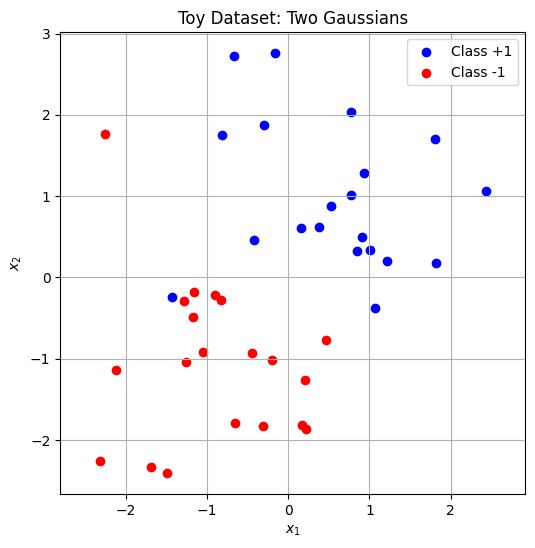

In [5]:
# Generate Gaussian blobs
n, d = 20, 2
x1 = np.random.normal(loc=1.0, scale=1.0, size=(n, d))
x2 = np.random.normal(loc=-1.0, scale=1.0, size=(n, d))

X = np.vstack((x1, x2))
Y = np.array([1] * n + [-1] * n)

# Visualization
plt.figure(figsize=(6, 6))
plt.scatter(x1[:, 0], x1[:, 1], color='blue', label='Class +1')
plt.scatter(x2[:, 0], x2[:, 1], color='red', label='Class -1')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Toy Dataset: Two Gaussians")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

We train kernel SVM with each kernel on this dataset.

In [6]:
lin_svm = BinaryKernelSVM(kernel='linear')
print("Linear SVM")
lin_svm.fit(X,Y)
print(f'Support vectors: {len(lin_svm.sv_y)}\n')

poly_svm = BinaryKernelSVM(kernel='polynomial',degree=2)
print("Polynomial kernel SVM")
poly_svm.fit(X,Y)
print(f'Support vectors: {len(poly_svm.sv_y)}\n')

rbf_svm = BinaryKernelSVM(kernel='rbf',sigma=0.2)
print("RBF kernel SVM")
rbf_svm.fit(X,Y)
print(f'Support vectors: {len(rbf_svm.sv_y)}\n')

Linear SVM
Support vectors: 8

Polynomial kernel SVM
Support vectors: 9

RBF kernel SVM
Support vectors: 38



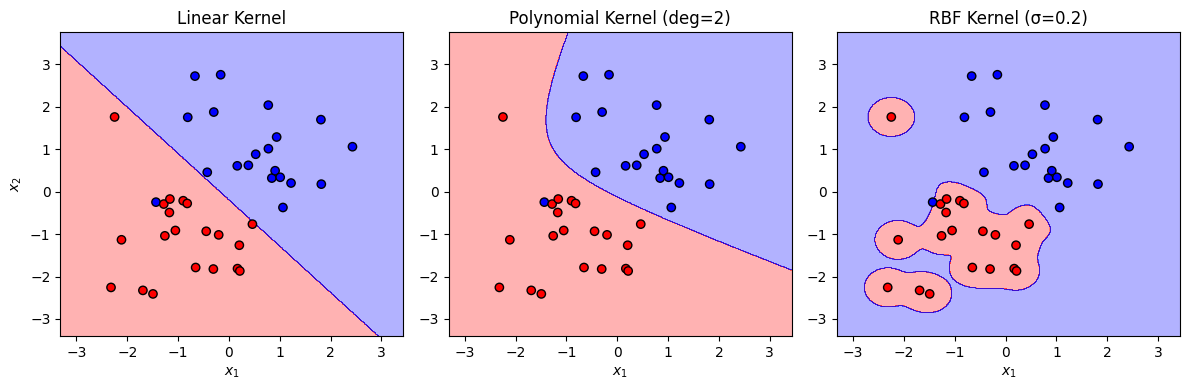

In [7]:
def plot_decision_boundary(X, models, labels):
    fig, ax = plt.subplots(1, len(models), figsize=(len(models)*4, 4))

    # Meshgrid for 2D prediction surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x1_list, x2_list = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                                np.arange(x2_min, x2_max, 0.01))
    X_list = np.dstack([x1_list, x2_list])

    # Colors
    cmap = matplotlib.colors.ListedColormap(['red', 'blue'])
    colors = np.where(Y < 0, 'red', 'blue')

    # Plot decision boundaries
    for _ax, model, title in zip(ax, models, labels):

        h_list = model(X_list)
        _ax.contourf(x1_list, x2_list, h_list, cmap=cmap, alpha=0.3)
        _ax.scatter(X[:, 0], X[:, 1], c=colors, edgecolor='k')

        _ax.set_title(title)
        _ax.set_xlabel('$x_1$')
        _ax.set_xlim(x1_min, x1_max)
        _ax.set_ylim(x2_min, x2_max)

    # Shared y-label
    ax[0].set_ylabel('$x_2$')
    plt.tight_layout()
    plt.show()

models = [lin_svm, poly_svm, rbf_svm]
labels = ['Linear Kernel', 'Polynomial Kernel (deg=2)', 'RBF Kernel (σ=0.2)']
plot_decision_boundary(X,models, labels)

## 🔵 Toy Dataset 2: Concentric Circles

In this second example, we’ll use a **nonlinearly separable dataset**: two concentric circles.

This highlights the limitations of a linear kernel and demonstrates the power of kernel methods, which can separate data in transformed feature space.


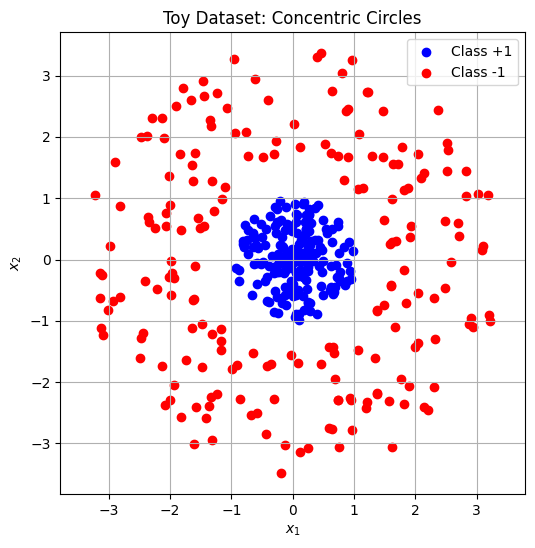

In [8]:
n = 200
d = 2

# Inner circle (radius ~ [0, 1])
r1 = np.random.rand(n)
x1 = np.random.normal(0, 1, size=(n, d))
x1 = x1 / np.linalg.norm(x1, axis=1, keepdims=True) * r1[:, np.newaxis]

# Outer ring (radius ~ [1.5, 3.5])
r2 = 1.5 + 2 * np.random.rand(n)
x2 = np.random.normal(0, 1, size=(n, d))
x2 = x2 / np.linalg.norm(x2, axis=1, keepdims=True) * r2[:, np.newaxis]

X = np.vstack((x1, x2))
Y = np.array([1]*n + [-1]*n)

# Visualization
plt.figure(figsize=(6, 6))
plt.scatter(x1[:, 0], x1[:, 1], color='blue', label='Class +1')
plt.scatter(x2[:, 0], x2[:, 1], color='red', label='Class -1')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Toy Dataset: Concentric Circles")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


In [9]:
lin_svm = BinaryKernelSVM(kernel='linear')
print("Linear SVM")
lin_svm.fit(X,Y)
print(f'Support vectors: {len(lin_svm.sv_y)}\n')

poly_svm = BinaryKernelSVM(kernel='polynomial',degree=2)
print("Polynomial kernel SVM")
poly_svm.fit(X,Y)
print(f'Support vectors: {len(poly_svm.sv_y)}\n')

rbf_svm = BinaryKernelSVM(kernel='rbf',sigma=1.0)
print("RBF kernel SVM")
rbf_svm.fit(X,Y)
print(f'Support vectors: {len(rbf_svm.sv_y)}\n')

Linear SVM
Support vectors: 391

Polynomial kernel SVM
Support vectors: 7

RBF kernel SVM
Support vectors: 30



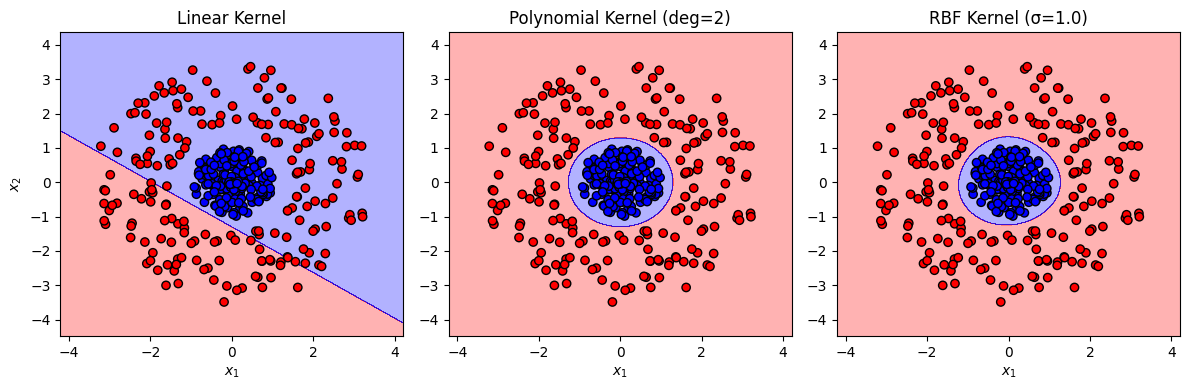

In [10]:
models = [lin_svm, poly_svm, rbf_svm]
labels = ['Linear Kernel', 'Polynomial Kernel (deg=2)', 'RBF Kernel (σ=1.0)']
plot_decision_boundary(X,models, labels)

## 🌙 Toy Dataset 3: Two Moons

In this final example, we use the classic **two moons** dataset — a standard benchmark for testing nonlinear classifiers.

This dataset is not linearly separable, but it becomes separable with the right kernel, such as the **RBF kernel** or higher order **polynomial kernel**.


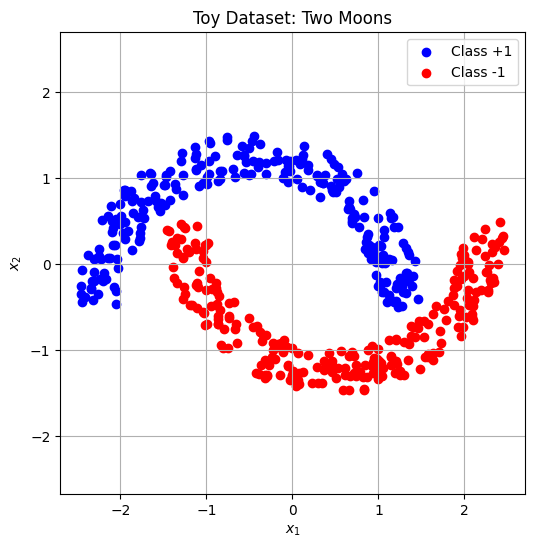

In [11]:
n = 500
d = 2

# Random radii
r = 1.5 + 0.5 * np.random.rand(n)

# Points on a unit circle scaled by r
x = np.random.normal(0, 1, size=(n, d))
x = x / np.linalg.norm(x, axis=-1, keepdims=True) * r[:, np.newaxis]

# Separate into upper and lower moon, then shift 
x1 = x[x[:, 1] > 0] - 0.5
x2 = x[x[:, 1] < 0] + 0.5

X = np.vstack((x1, x2))
Y = np.array([1] * len(x1) + [-1] * len(x2))

# Visualization
plt.figure(figsize=(6, 6))
plt.scatter(x1[:, 0], x1[:, 1], color='blue', label='Class +1')
plt.scatter(x2[:, 0], x2[:, 1], color='red', label='Class -1')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Toy Dataset: Two Moons")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

In [12]:
lin_svm = BinaryKernelSVM(kernel='linear')
print("Linear SVM")
lin_svm.fit(X,Y)
print(f'Support vectors: {len(lin_svm.sv_y)}\n')

poly_svm = BinaryKernelSVM(kernel='polynomial',degree=3)
print("Polynomial kernel SVM")
poly_svm.fit(X,Y)
print(f'Support vectors: {len(poly_svm.sv_y)}\n')

rbf_svm = BinaryKernelSVM(kernel='rbf',sigma=1.0)
print("RBF kernel SVM")
rbf_svm.fit(X,Y)
print(f'Support vectors: {len(rbf_svm.sv_y)}\n')

Linear SVM
Support vectors: 182

Polynomial kernel SVM
Support vectors: 15

RBF kernel SVM
Support vectors: 65



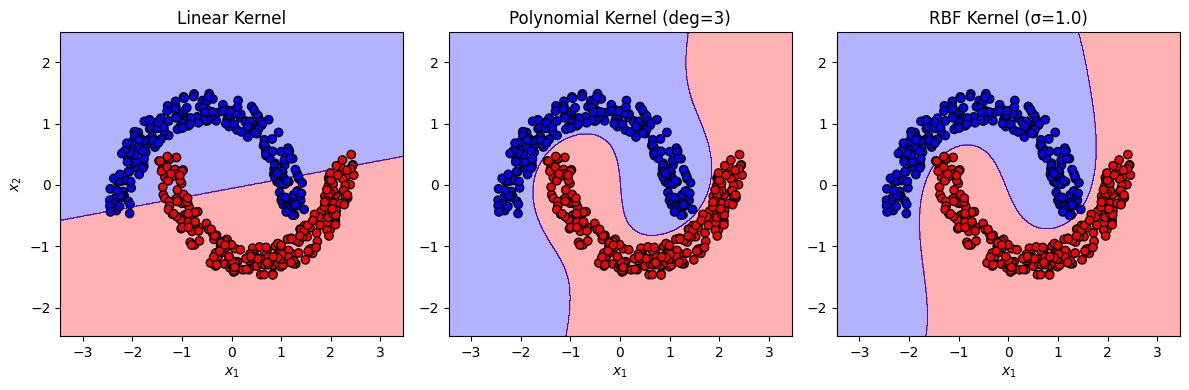

In [13]:
models = [lin_svm, poly_svm, rbf_svm]
labels = ['Linear Kernel', 'Polynomial Kernel (deg=3)', 'RBF Kernel (σ=1.0)']
plot_decision_boundary(X,models, labels)

# 🧪 Exercise: Exploring Kernel Hyperparameters

Explore how the **hyperparameters** of the **RBF kernel** and the **polynomial kernel** affect the performance of SVM on the three toy datasets.

Train your `BinaryKernelSVM` model using different kernel configurations and analyze the learned decision boundaries:
- **RBF Kernel:**  What is the effect of the $\sigma$ parameter? What happens when $\sigma$ is **very small** or **very large**?
- **Polynomial Kernel:**: What degree is **sufficient** to solve each dataset? What happens when the degree is too low or unnecessarily high?
- **Model Selection:**: Which kernel performs best on each dataset? How do the support vectors and decision boundaries differ?
